In [55]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load & Read data using pandas

In [56]:
# Read data using pandas
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/heartDisease.csv")

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0,1,127.0,0.0,0.0,NaN,NaN,NaN,4
2,60,1,4,132.0,218.0,0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1,2,99.0,1.0,1.3,2.0,NaN,NaN,4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 22.0 KB


# Data Converion in required datatypes

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['trestbps'] = le.fit_transform(df.trestbps.values)
df['trestbps'] = df['trestbps'].astype('int64')

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['chol'] = le.fit_transform(df.chol.values)
df['chol'] = df['chol'].astype('int64')

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['thalach'] = le.fit_transform(df.thalach.values)
df['thalach'] = df['thalach'].astype('int64')

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['exang'] = le.fit_transform(df.exang.values)
df['exang'] = df['exang'].astype('int64')

In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['oldpeak'] = le.fit_transform(df.oldpeak.values)
df['oldpeak'] = df['oldpeak'].astype('int64')

In [64]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['slope'] = le.fit_transform(df.slope.values)
df['slope'] = df['slope'].astype('int64')

In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['ca'] = le.fit_transform(df.ca.values)
df['ca'] = df['ca'].astype('int64')

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['thal'] = le.fit_transform(df.thal.values)
df['thal'] = df['thal'].astype('int64')

Replacing NaN Values-

In [67]:
#Replacing NaN values
import numpy as np

df['trestbps'].replace(np.NaN,df['trestbps'].mean,inplace=True)
df['chol'].replace(np.NaN,df['chol'].mean,inplace=True)
df['thalach'].replace(np.NaN,df['thalach'].mean,inplace=True)
df['exang'].replace(np.NaN,df['exang'].mean,inplace=True)
df['oldpeak'].replace(np.NaN,df['oldpeak'].mean,inplace=True)
df['slope'].replace(np.NaN,df['slope'].mean,inplace=True)
df['ca'].replace(np.NaN,df['ca'].mean,inplace=True)
df['thal'].replace(np.NaN,df['thal'].mean,inplace=True)

# Statistical Data Analysis-

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       200 non-null    int64
 1   sex       200 non-null    int64
 2   cp        200 non-null    int64
 3   trestbps  200 non-null    int64
 4   chol      200 non-null    int64
 5   fbs       200 non-null    int64
 6   restecg   200 non-null    int64
 7   thalach   200 non-null    int64
 8   exang     200 non-null    int64
 9   oldpeak   200 non-null    int64
 10  slope     200 non-null    int64
 11  ca        200 non-null    int64
 12  thal      200 non-null    int64
 13  num       200 non-null    int64
dtypes: int64(14)
memory usage: 22.0 KB


In [69]:
df.shape

(200, 14)

In [70]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,32.980000,37.760000,0.340000,0.735000,43.530000,7.895000,15.630000,27.840000,98.505000,71.225000,2.540000
std,7.811697,0.171015,0.795701,24.608688,32.442952,0.474898,0.683455,29.245609,14.455406,18.596296,33.664833,57.870588,53.994922,1.193955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,55.000000,1.000000,3.000000,14.750000,1.750000,0.000000,0.000000,20.000000,0.000000,4.000000,1.000000,48.750000,18.750000,1.000000
50%,60.000000,1.000000,4.000000,25.000000,34.500000,0.000000,1.000000,36.500000,1.000000,9.000000,4.500000,98.500000,68.500000,3.000000
75%,64.000000,1.000000,4.000000,45.250000,62.250000,1.000000,1.000000,61.250000,4.250000,19.250000,54.250000,148.250000,118.250000,4.000000
max,77.000000,1.000000,4.000000,95.000000,105.000000,1.000000,2.000000,111.000000,54.000000,69.000000,104.000000,198.000000,168.000000,4.000000


In [71]:
# Check for skewness : 
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps    1.005419
chol        0.383570
fbs         0.680636
restecg     0.391463
thalach     0.682403
exang       1.885461
oldpeak     1.495948
slope       0.886043
ca          0.000508
thal        0.170664
num        -0.050861
dtype: float64

In [72]:
# Check for the outliers by applying zscore
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(200, 14)
(183, 14)


In [73]:
# Separating target & input variables
import numpy as np
df_x=df_final.drop(columns=["num"])
y=df_final[["num"]]

In [74]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [75]:
# lets again check for skewness as its reduced now
x.skew()

age        -0.315096
sex         0.000000
cp         -1.351565
trestbps    1.080181
chol        0.409505
fbs         0.739427
restecg     0.374909
thalach     0.772000
exang       2.012110
oldpeak     1.585330
slope       0.958164
ca         -0.002783
thal        0.151047
dtype: float64

In [76]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
190,51,0,4,8,61,1,2,8,0,4,0,64,48,4
191,62,1,4,34,59,1,1,17,1,11,1,65,49,4
192,53,1,4,26,83,1,1,34,1,6,1,66,50,3
193,62,1,4,33,9,0,1,41,1,1,30,67,51,1
194,46,1,4,20,87,0,0,32,0,1,29,68,0,2
195,54,0,4,16,91,1,1,50,0,1,28,69,52,1
196,62,1,1,63,2,0,1,72,7,36,27,70,53,4
197,55,1,4,12,40,1,1,12,0,1,26,71,1,2
198,58,1,4,54,97,1,2,64,32,56,68,100,139,4
199,62,1,2,11,59,0,2,6,1,1,104,198,168,1


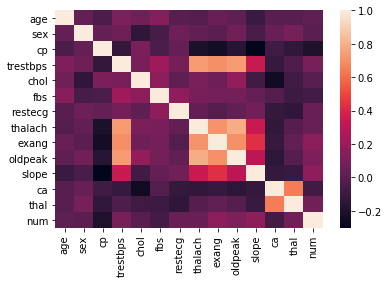

In [77]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

In [78]:
import pandas as pd

cols = df.columns.tolist()
print(cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


# Apply Logistic Regression Algorithm as target is categorical value

In [91]:
import pandas as pd

data=pd.get_dummies(df)

feature_cols = ['thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = data[feature_cols]

y = data.num  # y is a vector, hence we use dot to access 'label'

In [92]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 6)


In [93]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [95]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.3


In [97]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

4    17
1    16
3    12
2     5
Name: num, dtype: int64

In [103]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier(100)---default

rf=RandomForestClassifier(n_estimators=500,random_state=45)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.38
[[5 4 2 5]
 [3 1 1 0]
 [2 2 5 3]
 [6 2 1 8]]
              precision    recall  f1-score   support

           1       0.31      0.31      0.31        16
           2       0.11      0.20      0.14         5
           3       0.56      0.42      0.48        12
           4       0.50      0.47      0.48        17

    accuracy                           0.38        50
   macro avg       0.37      0.35      0.35        50
weighted avg       0.41      0.38      0.39        50



In [108]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier(base_estimator=DecisionTreeclassifier(),n_estimators=50,learning_rate=1.0)

ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.36
[[5 4 2 5]
 [3 1 1 0]
 [2 2 5 3]
 [6 3 1 7]]
              precision    recall  f1-score   support

           1       0.31      0.31      0.31        16
           2       0.10      0.20      0.13         5
           3       0.56      0.42      0.48        12
           4       0.47      0.41      0.44        17

    accuracy                           0.36        50
   macro avg       0.36      0.34      0.34        50
weighted avg       0.40      0.36      0.38        50



In [109]:
# import support vector classifier
from sklearn.svm import SVC
svc=SVC()

#create  adaboost classifier object
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,y_train)

ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.34
[[ 0  0  0 16]
 [ 0  0  0  5]
 [ 0  0  0 12]
 [ 0  0  0 17]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        12
           4       0.34      1.00      0.51        17

    accuracy                           0.34        50
   macro avg       0.09      0.25      0.13        50
weighted avg       0.12      0.34      0.17        50



In [113]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

# create  adaboost classifier object
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc)
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.34
[[ 0  0  0 16]
 [ 0  0  0  5]
 [ 0  0  0 12]
 [ 0  0  0 17]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        12
           4       0.34      1.00      0.51        17

    accuracy                           0.34        50
   macro avg       0.09      0.25      0.13        50
weighted avg       0.12      0.34      0.17        50



In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

# check score for all above esembled model & save anyone using joblib or pickle

0.36
[[4 4 4 4]
 [2 1 1 1]
 [1 3 5 3]
 [7 2 0 8]]
              precision    recall  f1-score   support

           1       0.29      0.25      0.27        16
           2       0.10      0.20      0.13         5
           3       0.50      0.42      0.45        12
           4       0.50      0.47      0.48        17

    accuracy                           0.36        50
   macro avg       0.35      0.33      0.33        50
weighted avg       0.39      0.36      0.37        50



In [100]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [118]:
# DecisionTreeClassifier(criterion='gini')---->default
# DecisionTreeClassifier(criterion='entropy')

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.42
[[ 7  1  4  4]
 [ 2  0  1  2]
 [ 3  1  3  5]
 [ 2  2  2 11]]
              precision    recall  f1-score   support

           1       0.50      0.44      0.47        16
           2       0.00      0.00      0.00         5
           3       0.30      0.25      0.27        12
           4       0.50      0.65      0.56        17

    accuracy                           0.42        50
   macro avg       0.33      0.33      0.33        50
weighted avg       0.40      0.42      0.41        50



In [122]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200,random_state=45)
rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred=rf.predict(X_test)
pred

array([3.485, 3.205, 1.88 , 2.405, 2.44 , 3.54 , 2.855, 2.485, 2.935,
       3.19 , 1.8  , 1.56 , 1.92 , 3.1  , 3.86 , 2.135, 2.43 , 2.325,
       3.415, 1.665, 3.24 , 3.035, 2.75 , 3.73 , 2.3  , 2.75 , 2.81 ,
       2.12 , 2.295, 2.245, 2.755, 2.665, 1.625, 1.905, 2.335, 3.505,
       3.18 , 2.32 , 3.455, 1.385, 2.9  , 2.41 , 1.685, 1.78 , 2.255,
       1.73 , 2.14 , 2.855, 3.31 , 3.135])

In [89]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=30)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.57142857 0.14285714 0.28571429 0.42857143 0.42857143 0.42857143
 0.71428571 0.57142857 0.28571429 0.57142857 0.42857143 0.14285714
 0.71428571 0.28571429 0.         0.28571429 0.28571429 0.28571429
 0.         0.28571429 0.16666667 0.16666667 0.16666667 0.
 0.         0.16666667 0.16666667 0.33333333 0.         0.16666667]
mean score: 0.28253968253968254
stn deviation: 0.20247274606715543
Y prediction values
[1 4 1 1 4 1 1 2 1 1 4 1 2 1 4 1 4 1 1 1 1 1 4 4 1 1 3 3 1 2 2 3 1 2 3 2 1
 1 2 4 4 4 2 4 2 2 1 3 4 1 1 4 1 1 1 2 2 1 4 1 4 2 2 2 2 2 3 1 4 4 1 1 4 2
 2 1 2 4 2 1 2 3 2 2 1 1 3 4 2 4 4 1 2 3 4 1 4 4 2 2 1 1 2 1 1 1 4 3 3 1 3
 1 4 4 3 1 2 3 1 4 4 3 1 4 2 4 3 1 2 3 4 1 2 2 4 2 4 4 3 4 4 3 4 4 1 2 1 4
 3 1 1 1 3 2 4 3 1 1 4 2 2 3 2 2 3 1 1 2 1 2 2 1 2 2 4 2 3 1 3 1 3 3 1 2 1
 3 1 1 4 2 3 2 4 2 1 3 2 1 3 1]
y_pred.shape (200,)


array([[20, 15, 10, 11],
       [18, 11,  5,  7],
       [14, 11,  8,  9],
       [18, 15,  9, 19]], dtype=int64)

In [130]:
from sklearn.externals import joblib

joblib_file = "joblib_rf.pkl"             # Save to file in the current working directory
joblib.dump(rf, joblib_file)
joblib_rf = joblib.load(joblib_file)      # Load from file
score = joblib_rf.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Random Forest Classifier: {0:.2f} %".format(100 * score))

Test score for Random Forest Classifier: 38.00 %


Conclusion - After applying all logistical model & regressor,booster,ensemble technique,final score getting as 38%.